<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/07_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章 サポートベクトルマシン

## 7.1 マージンを最大とする識別面を求める

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.svm import SVC

乱数を使って、データを生成
* 2クラス
* 特徴ベクトルは2次元（冗長な次元はなし）
* 各クラスにつき一つの正規分布からデータを生成
* ランダムにクラスを反転させることは行わない
* クラスが適度に分かれているように調整

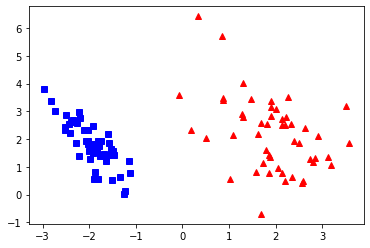

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=2.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

線形カーネル(linear)は、この特徴空間でマージン最大化を行うものです。

In [3]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

識別面を表示します。

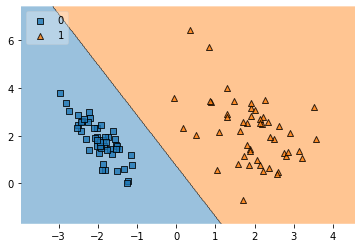

In [4]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.2 ソフトマージンによる誤識別データの吸収

クラスの分離度(class_sep)の値を少し小さくして、やや難しいデータを作成し、同様の手順でSVMによる識別を行います。

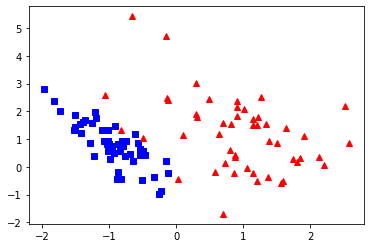

In [5]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=1.0, random_state=2)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

In [6]:
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

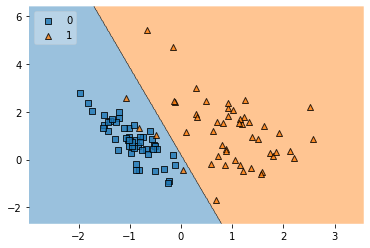

In [7]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.3 カーネル関数を用いたSVM

非線形識別面での識別を行うので、さらにデータを複雑なものにします。

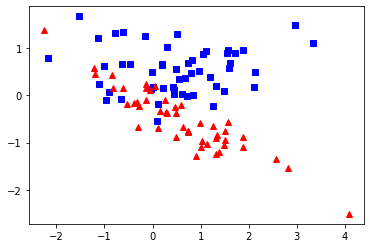

In [8]:
X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=3)
plt.plot(X[y==0,0], X[y==0,1],"bs")
plt.plot(X[y==1,0], X[y==1,1],"r^")

多項式カーネル

In [9]:
clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

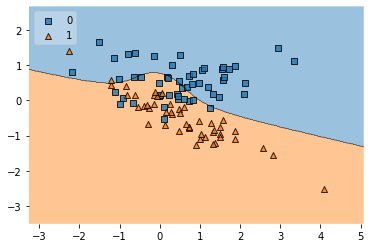

In [10]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

RBFカーネル

In [11]:
clf = SVC(kernel='rbf', gamma=1, C=1)
clf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

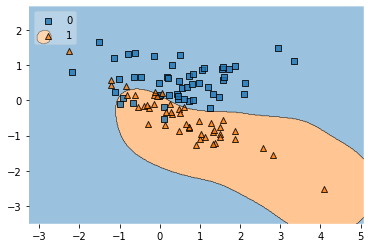

In [12]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

## 7.4 ハイパーパラメータのグリッドサーチ

In [13]:
from sklearn.model_selection import GridSearchCV

「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせでGridSearchを行います。

パラメータとして多項式カーネルを与えて、サポートベクトルマシン[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)のインスタンスsvcを作成します。

In [14]:
svc = SVC(kernel='poly')
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

GridSearchを行います。「スラック変数の重みC」と「多項式カーネルの次数degree」の組み合わせで、リストを値とするディクショナリの配列param\_gridを作成します。

In [15]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [1,2,3]}
 ]

識別器のインスタンスを第1引数、グリッドを第2引数として、[GridSearch](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)のインスタンスを作成し、fitメソッドを実行します。パラメータcvの値がNone（デフォルト）のとき、性能は3-fold CVで評価されます。

In [16]:
clf = GridSearchCV(svc, param_grid, cv=5, iid=False, return_train_score=True)
clf.fit(X, y)                            

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

結果はcv\_results\_属性の値として、ディクショナリで得られます。

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.00079794, 0.00040236, 0.00100002, 0.00059795, 0.00039916,
        0.00079932, 0.00119228, 0.00059128, 0.00039897, 0.00139546,
        0.00139828, 0.00159521, 0.00319095, 0.00648298, 0.02503343]),
 'std_fit_time': array([3.98969892e-04, 4.92814043e-04, 6.04211199e-06, 4.88227254e-04,
        4.88869687e-04, 3.99670462e-04, 4.05145005e-04, 4.82822217e-04,
        4.88636039e-04, 4.87547025e-04, 4.90806136e-04, 7.97784511e-04,
        2.39338877e-03, 5.71332537e-03, 2.33907589e-02]),
 'mean_score_time': array([0.00059905, 0.00079484, 0.00039611, 0.00039902, 0.00039883,
        0.        , 0.        , 0.00060143, 0.00059838, 0.00059848,
        0.00039525, 0.00039907, 0.00039907, 0.        , 0.00019951]),
 'std_score_time': array([0.00048913, 0.00039747, 0.00048516, 0.00048869, 0.00048846,
        0.        , 0.        , 0.00049113, 0.00048858, 0.00048866,
        0.00048412, 0.00048875, 0.00048875, 0.        , 0.00039902]),
 'param_C': masked_array(data=[0.1, 0.

すべてのパラメータの組み合わせについて、スコアを表示します。

In [18]:
re = clf.cv_results_
for params, mean_score, std_score in zip(re['params'], re['mean_test_score'], re['std_test_score']):
    print("{:.3f} (+/- {:.3f}) for {}".format(mean_score, std_score*2, params))

0.840 (+/- 0.133) for {'C': 0.1, 'degree': 1}
0.680 (+/- 0.185) for {'C': 0.1, 'degree': 2}
0.770 (+/- 0.136) for {'C': 0.1, 'degree': 3}
0.850 (+/- 0.110) for {'C': 1, 'degree': 1}
0.710 (+/- 0.232) for {'C': 1, 'degree': 2}
0.780 (+/- 0.136) for {'C': 1, 'degree': 3}
0.880 (+/- 0.174) for {'C': 10, 'degree': 1}
0.790 (+/- 0.117) for {'C': 10, 'degree': 2}
0.770 (+/- 0.174) for {'C': 10, 'degree': 3}
0.870 (+/- 0.136) for {'C': 100, 'degree': 1}
0.750 (+/- 0.063) for {'C': 100, 'degree': 2}
0.790 (+/- 0.117) for {'C': 100, 'degree': 3}
0.860 (+/- 0.133) for {'C': 1000, 'degree': 1}
0.770 (+/- 0.049) for {'C': 1000, 'degree': 2}
0.800 (+/- 0.089) for {'C': 1000, 'degree': 3}


性能が最大となるパラメータとそのときのスコアを表示します。

In [19]:
clf.best_params_

{'C': 10, 'degree': 1}

In [20]:
clf.best_score_

0.8800000000000001

## 課題

GridSearchCV でscikit-learn付属の wine データに対する多項式カーネルサポートベクトルマシン(SVC) 識別の最適なハイパーパラメータ(Cとdegree)の組み合わせを求めてください。余裕があれば、多項式カーネル以外にRBFカーネルも探索の対象として最適なパラメータの組み合わせを求めてください。